In [1]:
path = '../Data/'

In [10]:
with open(path + 'train.csv', 'r') as file:
    i = 0
    file_label = set()
    for line in file:
        ls = line.split(',')
        file_label.add(ls[0] + '_' + ls[1])
#         print (line)
#         i += 1
#         if i == 1000000:
#             break

In [12]:
len(file_label)

116625

In [16]:
len([fl.split('_')[0] for fl in file_label])

116625

In [37]:
label = [fl.split('_')[1] for fl in file_label]
import pandas as pd
label_series = pd.Series(label)

In [45]:
label_counts = label_series.value_counts()
label_counts = label_counts[label_counts.index != 'id']
label_counts

0    111545
5      3397
2       744
3       598
1       287
4        53
dtype: int64

In [48]:
nagtive_sample_number = label_counts[label_counts.index != '0'].sum()
nagtive_sample_number

5079

In [4]:
import numpy as np

nagtive_sample_number = 5079
positive_sample_ratio = nagtive_sample_number * 5 / 111545
positive_sample_dict = {}
with open(path + 'train_api_id.csv', 'r') as file, open(path + 'train_api_id_sample5.csv', 'w+') as output_file:
    for line in file:
        ls = line.split(',')
        label = ls[1]
        if label != '0':
            output_file.write(line)
        else:
            file_id = ls[0]
            if file_id not in positive_sample_dict:
                positive_sample_dict[file_id] = np.random.rand() < positive_sample_ratio
            if positive_sample_dict[file_id]:
                output_file.write(line)

In [52]:
print ('Total positive: ', len(positive_sample_dict), 'Selected positive: ', sum([i for i in positive_sample_dict.values()]))

Total positive:  111545 Selected positive:  50851


In [55]:
api_num = 0
api_dict = dict()
with open(path + 'train.csv', 'r') as file, open(path + 'apis.csv', 'w+') as output_file:
    for line in file:
        ls = line.split(',')
        api = ls[2]
        if api not in api_dict:
            api_dict[api] = api_num
            api_str = api + ',' + str(api_num)
            output_file.write(api_str)
            api_num += 1

In [87]:
len(api_dict)

312

In [88]:
with open(path + 'apis.csv', 'w+') as output_file:
    for api, id in sorted(api_dict.items(), key = lambda kv: kv[1]):
#         print (api)
        api_str = api + ',' + str(id) + '\n'
        output_file.write(api_str)
# # api_dict.iteritems()

In [86]:
api_dict.pop('EncryptMessage')
with open(path + 'test.csv', 'r') as file:
    for line in file:
        ls = line.split(',')
        api = ls[1]
        if api not in api_dict:
            print(api)
            api_dict[api] = api_num
            api_num += 1

EncryptMessage
NtLoadKey2
WNetGetProviderNameW


In [92]:
with open(path + 'train.csv', 'r') as file, open(path + 'train_api_id.csv', 'w+') as output_file:
    i = 0
    for line in file:
        if i == 0:
            output_file.write(line)
        else:
            ls = line.split(',')
            ls[2] = str(api_dict[ls[2]])
            out_str = ','.join(ls)
            output_file.write(out_str)
        i += 1
#         if i == 100:
#             break

In [ ]:
with open(path + 'test.csv', 'r') as file, open(path + 'test_api_id.csv', 'w+') as output_file:
    i = 0
    for line in file:
        if i == 0:
            output_file.write(line)
        else:
            ls = line.split(',')
            ls[1] = str(api_dict[ls[1]])
            out_str = ','.join(ls)
            output_file.write(out_str)
        i += 1
#         if i == 100:
#             break

In [2]:
import pandas as pd

path = '../Data/'
dtypes = {
'file_id' : 'uint32', 'label' : 'uint8', 'api' : 'uint16', 'tid' : 'uint16', 'return_value' : 'int64', 'index' : 'uint16'
        }
train = pd.read_csv(path + 'train_api_id_sample_10.csv', )
# test = pd.read_csv(path + 'test_api_id.csv')

In [101]:
file_apis = train[:1000].groupby(['file_id'])['api'].apply(lambda s: ' '.join([str(v) for v in s]))

In [110]:
file_apis.values

array(['20 17',
       '1 16 6 16 15 4 21 12 12 22 23 2 15 16 16 17 17 15 14 15 15 3 15 15 15 15 15 18 19 15 15 15 15 17',
       '5 6 6 6 6 6 6 6 6 6 8 15 24 25 15 26 15 15 7 5 6 6 6 6 5 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 5 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 5 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 5 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 27 27 28 28 28 15 29 29 29 29 30 2 30 30 3

In [31]:
from sklearn import feature_extraction

# train_row = train.shape[0]
# df = train.append(test)
# del train
# del test
# print (df.shape)


In [58]:
api_counts.shape

(56059, 311)

In [130]:
labels = train.groupby(['file_id'])['label'].first()

In [41]:
labels.shape

(56059,)

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

path = '../Data/'
dtypes = {
'file_id' : 'uint32', 'label' : 'uint8', 'api' : 'uint16', 'tid' : 'uint16', 'return_value' : 'int64', 'index' : 'uint16'
        }
train = pd.read_csv(path + 'train_api_id_sample_10.csv', usecols = ['file_id', 'label', 'api', 'tid', 'index'], dtype = dtypes)
test = pd.read_csv(path + 'test_api_id.csv', usecols = ['file_id', 'api', 'tid', 'index'], dtype = dtypes)
test['file_id'] += train['file_id'].max() + 1
# test.head()


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [154]:
pd.set_option('max_rows', 1000)

train[:10000].groupby(['file_id', ])['tid', 'index', 'api'].apply(
    lambda s: s.sort_values(by = ['tid', 'index'])[['api']].apply(lambda s: ' '.join([str(x) for x in s]))) #) #.apply(lambda s: ' '.join(str(x) for x in s), axis = 0)
#                    .sort_values(by = 'index', axis = 0))

,api
file_id,
1,20 17
2,1 16 6 16 15 4 21 12 12 22 23 2 15 16 16 17 17...
3,5 6 6 6 6 6 6 6 6 6 8 15 24 25 15 26 15 15 7 5...
4,69 15 15 15 5 6 6 6 6 6 6 6 6 6 6 6 1 70 18 19...
5,1 4 83 15 83 15 38 39 5 6 6 35 24 9 10 15 15 2...


In [109]:
df = pd.DataFrame({'A': 'a a b'.split(), 'B': [1,2,3], 'C': [4,6, 5]})
df

,A,B,C
0,a,1,4
1,a,2,6
2,b,3,5


In [113]:
g.apply(lambda x: x / x.sum())
g.apply(lambda x: x.max() - x.min())

,B,C
A,,
a,1,2
b,0,0


In [25]:
import pickle
from tqdm import tqdm, tqdm_notebook
tqdm.pandas(tqdm_notebook)

def gen_label(df):
    labels = df.groupby(['file_id'])['label'].first()
    return labels

def gen_apis_count_tfidf(df):
    with open(path + 'train_test_api_counts_tfidf.pickle', 'rb') as handle:
        features = pickle.load(handle)
        return features
    apis = pd.read_csv(path + 'apis.csv')
    api_dict = dict((str(apis.iloc[i].id), i) for i in range(apis.shape[0]))
    file_apis = df.groupby(['file_id'])['api'].apply(lambda s: ' '.join([str(v) for v in s]))
    
    CountTokenize = feature_extraction.text.CountVectorizer('content', vocabulary = api_dict)
    TfidfTransformer = feature_extraction.text.TfidfTransformer()
    api_counts = CountTokenize.fit_transform(file_apis.values).toarray()
    api_tfidf = TfidfTransformer.fit_transform(api_counts).toarray()
    features = np.c_[api_counts, api_tfidf]
    with open(path + 'train_pos5_test_api_counts_tfidf.pickle', 'wb+') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return features

def gen_apis_count_tfidf_rm_consec_dup(df):
#     with open(path + 'train_test_api_counts_tfidf_rm_consec_dup.pickle', 'rb') as handle:
#         features = pickle.load(handle)
#         return features
    apis = pd.read_csv(path + 'apis.csv')
    api_dict = dict((str(apis.iloc[i].id), i) for i in range(apis.shape[0]))
    
    with open(path + 'train_test_api_strs.pickle', 'rb') as handle:
        file_apis = pickle.load(handle)
    def rm_conc_dup(s):
#         print (s)
        s_a = np.array(s.split(' '))
        dup_re = s_a[s_a != np.append(s_a[1:], ' ')]
        dup_re = ' '.join(dup_re)
        return dup_re
    file_apis = file_apis.progress_apply(rm_conc_dup)
    with open(path + 'train_pos10_test_api_strs_consec_dup.pickle', 'wb+') as handle:
        pickle.dump(file_apis, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print (file_apis.head())
#     file_apis = df.groupby(['file_id'])['api'].apply(lambda s: ' '.join([str(v) for v in s[s.shift() != s]]))
    
    print ('count_vectorizer...')
    CountTokenize = feature_extraction.text.CountVectorizer('content', vocabulary = api_dict)
    TfidfTransformer = feature_extraction.text.TfidfTransformer()
    api_counts = CountTokenize.fit_transform(file_apis.values).toarray()
    print ('TfidfTransformer...')
    api_tfidf = TfidfTransformer.fit_transform(api_counts).toarray()
    features = np.c_[api_counts, api_tfidf]
    with open(path + 'train_pos10_test_api_counts_tfidf_rm_consec_dup.pickle', 'wb+') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return features

def gen_api_ngram_counts(df, ngram = 2, max_features = 100000, svd_dim = 50, svd_iter =25):
    features_file_name = path + 'train_test_api_counts_' + '_'.join([ \
        str(ngram), str(max_features), str(svd_dim), str(svd_iter)]) + '_.pickle'
    if os.path.isfile(features_file_name):
        with open(features_file_name, 'rb') as handle:
            features = pickle.load(handle)
            return features

#     file_apis = df.groupby(['file_id', ])['tid', 'index', 'api'].apply( \
#         lambda s: s.sort_values(by = ['tid', 'index'])[['api']].apply( \
#             lambda s: ' '.join(str(x) for x in s)))['api']
#     with open(path + 'train_test_api_strs.pickle', 'wb+') as handle:
#         pickle.dump(file_apis, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(path + 'train_test_api_strs.pickle', 'rb') as handle:
        file_apis = pickle.load(handle)
    print ('file_apis shape: ', file_apis.shape)
#     print (file_apis.head())
    
    print('Pipeline...')
    print ('count_vectorizer...')
    count_vectorizer_file_name = path + 'train_test_api_counts_' + '_'.join([str(ngram), str(max_features)]) + '_.pickle'
    if os.path.isfile(count_vectorizer_file_name):
        with open(count_vectorizer_file_name, 'rb') as handle:
            count_vectorizer_features = pickle.load(handle)
    else:
        count_vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(1, ngram), max_features = max_features)
        count_vectorizer_features = count_vectorizer.fit_transform(file_apis.values)
        with open(count_vectorizer_file_name, 'wb+') as handle:
            pickle.dump(count_vectorizer_features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    print ('SVD...')
    svd = decomposition.TruncatedSVD(n_components=svd_dim, n_iter=svd_iter, random_state=12)
    svd_features = svd.fit_transform(count_vectorizer_features)
#     fp = pipeline.Pipeline([ \
#         ('count_api', feature_extraction.text.CountVectorizer(ngram_range=(1, ngram), max_features = max_features)),\
#         ('tsvd', decomposition.TruncatedSVD(n_components=svd_dim, n_iter=svd_iter, random_state=12))])
    
    features = svd_features #fp.fit_transform(file_apis.values);
    print ('Features shape: ', features.shape)
    with open(features_file_name, 'wb+') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return features

def gen_return_value_features(df):
    return_value = pd.read_csv(path + 'return_value_norm.csv', dtype = {'re': np.int64, 'norm_re': np.int16})
    return_value_dict = dict((return_value.iloc[i]['re'], return_value.iloc[i]['norm_re']) for i in range(return_value.shape[0]))
    file_return_value = df.groupby(['file_id'])['return_value'].apply(lambda s: ' '.join([str(return_value_dict[v]) for v in s]))
    
    CountTokenize = feature_extraction.text.CountVectorizer()
    TfidfTransformer = feature_extraction.text.TfidfTransformer()
    re_counts = CountTokenize.fit_transform(file_return_value.values).toarray()
    re_tfidf = TfidfTransformer.fit_transform(re_counts).toarray()
    
    features = np.c_[re_counts, re_tfidf]
    with open(path + 'train_test_re_counts_tfidf.pickle', 'wb+') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return features

In [4]:
# del df
print (train.shape, test.shape)
train_flat_len = train.shape[0]
labels = gen_label(train)
train_row = len(labels)
print ('train file size: ', train_row)
train.drop(columns = ['label'], inplace = True)
df = pd.concat([train, test], axis = 0, sort = False)
print ('df shape: ', df.shape)
del train
del test

(207936658, 5) (198719006, 4)
train file size:  56059
df shape:  (406655664, 4)


In [77]:
with open(path + 'train_pos10_labels.pickle', 'wb+') as handle:
    pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
df.shape

(406655664, 4)

In [4]:
# del train, test
api_ngram_features = gen_api_ngram_counts(df, 6, 100000, 200, 25)

In [26]:
api_counts_tfidf = gen_apis_count_tfidf_rm_consec_dup(df)

100%|██████████| 109152/109152 [03:20<00:00, 543.31it/s]


file_id
1                                                20 17
2    1 16 6 16 15 4 21 12 22 23 2 15 16 17 15 14 15...
3    5 6 8 15 24 25 15 26 15 7 5 6 5 6 5 6 5 6 5 6 ...
4    69 15 5 6 1 70 18 19 15 8 1 18 71 5 6 28 32 23...
5    1 4 83 15 83 15 38 39 5 6 35 24 9 10 15 21 4 8...
Name: api, dtype: object
count_vectorizer...
TfidfTransformer...


In [22]:
api_features = api_counts_tfidf #np.c_[api_ngram_features, api_counts_tfidf]

In [17]:
api_counts_tfidf.shape

(109152, 622)

In [8]:
# re_features = gen_return_value_features(df)
labels = gen_label(df)

In [10]:
train_row = len(labels) - labels.isnull().sum()
train_row
# %time print(labels.head())

56059

In [21]:
labels[labels.isnull()].sum()

SyntaxError: invalid syntax (<ipython-input-21-8c1bfc637cb3>, line 1)

In [25]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

train.groupby(['file_id', 'tid'])['api'].apply(lambda s: ' '.join([str(v) for v in s[s.shift() != s]]))

KeyboardInterrupt: 

In [4]:
features, labels = gen_features_label(pd.concat([train, test], axis = 0, sort = False))

In [23]:
train_features = api_features[:train_row]
test_features = api_features[train_row:]
train_labels = labels #[:train_row]
# del features

In [26]:
train_features.shape

(30348, 622)

In [279]:
train_labels.unique()

array([5., 0., 2., 3., 1., 4.])

In [12]:
import pickle

with open(path + 'train_test_api_counts_tfidf.pickle', 'wb+') as handle:
    pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
# del train
# del train_features
# test = pd.read_csv(path + 'test_api_id.csv')
# test_api_counts, _ = gen_features_label(test)
# with open(path + 'test_api_counts.pickle', 'wb+') as handle:
#     pickle.dump(test_api_counts, handle, protocol=pickle.HIGHEST_PROTOCOL)

[1.   1.   1.   ... 3.68 3.68 3.68]


In [28]:
len(FEATURE_LIST)

622

In [24]:
folds = 5
kf = model_selection.KFold(n_splits=folds, shuffle=False)
fold = 0
pred = np.zeros((test_features.shape[0], 6))
for train_index, test_index in kf.split(train_labels):
    print ('Epoch: ', fold)
    params = {
    # 'num_leaves':-1,
        'task': 'train',
        'min_sum_hessian_in_leaf':None,
        'max_depth':7,
        'learning_rate':0.01,
        'feature_fraction':0.8,
        'verbose':-1,
        'objective': 'multiclass',
        'num_class':6,
        'metric': 'multi_logloss',
    #     'num_boost_round':200,
        'drop_rate':None,
        'bagging_fraction':0.6,
        'bagging_freq':5,
        'early_stopping_round':100,
        # 'min_data_in_leaf':100,
    #     'max_bin': None,
        'scale_pos_weight':None,
    }
    FEATURE_LIST = ['api_cnt_svd_' + str(i) for i in range(train_features.shape[1])] #list(apis['api'].values) + list((apis['api'] + '_tfidf').values)
    folds = 5
    instance_weight = np.ones(train_row)
    instance_weight[train_labels == 0] = 1.99
#     print (instance_weight)
    fold += 1
    train_part, valide_part = train_features[train_index], train_features[test_index]
    train_part_label, valide_part_label = train_labels.values[train_index], train_labels.values[test_index]
    train_instance_weight, valide_instance_weight = instance_weight[train_index], instance_weight[test_index]
    
    d_train = lgb.Dataset(train_part, label=train_part_label, feature_name = FEATURE_LIST, weight = train_instance_weight)
    d_valide = lgb.Dataset(valide_part, label=valide_part_label, feature_name = FEATURE_LIST, weight = valide_instance_weight)
    
    model = lgb.train(params, 
                d_train, 
                valid_sets = [d_train, d_valide], 
                verbose_eval=200,
                 num_boost_round = 3000)
    pred += model.predict(test_features, num_iteration=model.best_iteration)
pred /= folds

Epoch:  0


/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	training's multi_logloss: 0.223687	valid_1's multi_logloss: 0.224795
[400]	training's multi_logloss: 0.057545	valid_1's multi_logloss: 0.0614042
[600]	training's multi_logloss: 0.0268937	valid_1's multi_logloss: 0.0347435
[800]	training's multi_logloss: 0.0170623	valid_1's multi_logloss: 0.0283207
[1000]	training's multi_logloss: 0.012481	valid_1's multi_logloss: 0.0262964
[1200]	training's multi_logloss: 0.00968108	valid_1's multi_logloss: 0.0255073
[1400]	training's multi_logloss: 0.00785238	valid_1's multi_logloss: 0.0252982
Early stopping, best iteration is:
[1405]	training's multi_logloss: 0.00781179	valid_1's multi_logloss: 0.0252802
Epoch:  1
Training until validation scores don't improve for 100 rounds.
[200]	training's multi_logloss: 0.22298	valid_1's multi_logloss: 0.225826


KeyboardInterrupt: 

In [18]:
columns = ['prob' + str(i) for i in range(6)]
sub = pd.DataFrame(pred, columns = columns)
sub.index.name = 'file_id'
sub.to_csv(path + 'submission_posweight_199_5folds_api_counts_tfidf.csv')

In [ ]:
with open(path + 'train_test_api_strs_consec_dup_by_tid.pickle', 'rb') as handle:
    tid_features = pickle.load(handle)

In [ ]:
tid_features_len = tid_features.apply(lambda s: len(s.split(' ')))

In [82]:
print (tid_features_len.max(), tid_features_len.min(), tid_features_len.median(), tid_features_len.mean())

12276 1 16.0 210.20973086771295


In [89]:
tid_len = tid_features.groupby('file_id').apply(lambda s: s.shape[0])

In [90]:
print (tid_len.max(), tid_len.min(), tid_len.median(), tid_len.mean())

2474 1 3.0 8.686952457425006


In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn import *
import numpy as np
# import matplotlib.pyplot as plt
import os
import pickle 

path = '../Data/'
with open(path + 'full_train_api_strs_rm_cons_dup.pickle', 'rb') as handle:
    features = pickle.load(handle)
#     features = features.values
# with open(path + 'train_pos10_test_api_counts_tfidf_rm_consec_dup.pickle', 'rb') as handle:
#     features = pickle.load(handle)

with open(path + 'full_train_labels.pickle', 'rb') as handle:
    labels = pickle.load(handle)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [25]:
with open(path + 'full_test_api_strs_rm_cons_dup.pickle', 'rb') as handle:
    test_features = pickle.load(handle)

In [9]:
labels.shape[0]

116624

In [ ]:
print (len_s.max(), len_s.min(), len_s.median(), len_s.mean())

In [8]:
116624 * 2400 * 4 / 1e9

1.1195904

In [7]:
rnn_data.shape

(116624, 2400)

In [3]:
rnn_data = tokenizer(features)

Tokenizer...


In [26]:
test_features = tokenizer(test_features)

Tokenizer...


In [98]:
rnn_data_df = pd.DataFrame(rnn_data, index = tid_features.index)

In [99]:
rnn_data_df.head()

0    1    2    3    4    5    6    7    8    9   ...   190  191  \
file_id tid                                                    ...              
1       2524    0    0    0    0    0    0    0    0    0    0 ...     0    0   
2       2516    0    0    0    0    0    0    0    0    0    0 ...    76    1   
3       2508   19   16   19   16   29    9    4   85   11    4 ...    17   19   
        2732    0    0    0    0    0    0    0    0    0    0 ...   110    1   
        2844    0    0    0    0    0    0    0    0    0    0 ...     0    0   

              192  193  194  195  196  197  198  199  
file_id tid                                           
1       2524    0    0    0    0    0    0   79   76  
2       2516   30    1   20    1   14    7    1   76  
3       2508   16   19   16   34   87   34   27   34  
        2732   20   76    1   44   14    7    1   76  
        2844    0    0    0    0    0    0   44    1  

[5 rows x 200 columns]

In [119]:
pad_sequences(rnn_data_df[:1000].groupby('file_id').apply(lambda s: np.c_[s].flatten()).values, maxlen =1600).reshape(-1, 8, 200).shape

(132, 8, 200)

In [230]:
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
# train_features = features[:train_row] #rnn_data[:train_row]
# test_data = rnn_data[train_row:]

In [161]:
train_features.shape

(5000, 8, 200)

In [10]:
train_row = len(labels)
train_features = rnn_data[:train_row] #rnn_data[:train_row]
enc = preprocessing.OneHotEncoder()
train_labels = enc.fit_transform(np.reshape(labels.values[:train_row], (-1, 1))).toarray()
instance_weight = np.ones(train_row)
instance_weight[labels == 0] = 1.99

In [ ]:
folds = 5
kf = model_selection.KFold(n_splits=folds, shuffle=False)
fold = 0
pred = np.zeros((test_features.shape[0], 6))
valid_pred = np.zeros((train_features.shape[0], 6))
for train_index, test_index in kf.split(train_labels):
    print ('Epoch: ', fold)
    train_part, valide_part = train_features[train_index], train_features[test_index]
    train_part_label, valide_part_label = train_labels[train_index], train_labels[test_index]
    train_instance_weight, valide_instance_weight = instance_weight[train_index], instance_weight[test_index]
    
    model = DNN_Model()
    if fold == 0:
        print(model.model.summary())
    model.train(train_part, train_part_label, valide_part, valide_part_label)
    fold += 1
    pred += model.predict(test_features)
    valid_pred[test_index] = model.predict(valide_part)
pred /= folds
pd.DataFrame(valid_pred).to_csv('valid_pred.csv')

Epoch:  0
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 2400)          0                                            
____________________________________________________________________________________________________
emb (Embedding)                  (None, 2400, 128)     39936       input_9[0][0]                    
____________________________________________________________________________________________________
spa_dropout (SpatialDropout1D)   (None, 2400, 128)     0           emb[0][0]                        
____________________________________________________________________________________________________
conv1d_1 (Conv1D)                (None, 1200, 64)      8256        spa_dropout[0][0]                
_________________________________________________________________________________

In [31]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.layers import Dense, Input, Lambda, LSTM, TimeDistributed, SimpleRNN, \
        GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, Activation, \
        SpatialDropout1D, Conv2D, Conv1D, Reshape, Flatten, AveragePooling2D, MaxPooling2D, Dropout, AlphaDropout, \
        MaxPooling1D, AveragePooling1D, Embedding, Concatenate, BatchNormalization, Multiply, Add
# from tensorflow.python.keras.layers import concatenate
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.callbacks import EarlyStopping, Callback
from tensorflow.python.keras.regularizers import l1, l2
from tensorflow.python.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.python.keras.losses import mean_squared_error, binary_crossentropy
from tensorflow.python.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


MAX_TID_LEN = 800
MAX_TID_NUM = 4
MAX_LEN = 2400 #MAX_TID_LEN * MAX_TID_NUM

def tokenizer(data):
    print('Tokenizer...')
    tokenizer = Tokenizer(num_words = 312)
    tokenizer.fit_on_texts(data)
    data = pad_sequences(tokenizer.texts_to_sequences(data), maxlen = MAX_LEN)
#     data = pd.DataFrame(data, index = tid_features.index)
#     data = pad_sequences(data.groupby('file_id').apply(lambda s: np.c_[s].flatten()).values, 
#                   maxlen = MAX_LEN).reshape(-1, MAX_TID_NUM, MAX_TID_LEN)
    return data
        
class MutiLoglossEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1, batch_interval = 1000000, verbose = 2, \
            scores = []):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data
        # print("y_val shape:{0}".format(self.y_val.shape))
        self.batch_interval = batch_interval
        self.verbose = verbose
        self.scores = scores

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0, batch_size=None)
            score = metrics.log_loss(self.y_val, y_pred, sample_weight = None)
#             self.scores.append("epoch:{0} {1}".format(epoch + 1, score))
            print("\n Logloss - epoch: %d - score: %.6f \n" % (epoch+1, score))
    
    def on_batch_end(self, batch, logs={}):
        return
        if(self.verbose >= 2) and (batch % self.batch_interval == 0):
            # y_pred = self.model.predict(self.X_val, verbose=0)
            # loss = metrics.log_loss(self.y_val, y_pred)
            print("Hi! on_batch_end() , batch=",batch,",logs:",logs)
            # print("Valide size=",y_pred.shape[0], "  Valide loss=",loss)
            
class DNN_Model:
    """
    """
    def __init__(self):
        self.hidden_dim = [128, 64, 32]
        self.batch_size = 512 #flags.batch_size
        self.epochs = 100 #flags.epochs
        self.batch_interval = 0 #flags.batch_interval
        self.emb_dropout = 0.2 #flags.emb_dropout
        self.full_connect_dropout = 0 #flags.full_connect_dropout
#         self.emb_dim = [int(e.strip()) for e in flags.emb_dim.strip().split(',')]
        self.dense_input_len = 622
#         self.load_only_singleCnt = flags.load_only_singleCnt
        self.max_token = 312 #flags.vocab_size
        self.embedding_dim = 128 #flags.gram_embedding_dim
#         self.fix_wv_model = flags.fix_wv_model
        self.filter_size = [64] #[int(hn.strip()) for hn in flags.filter_size.strip().split(',')]
        self.kernel_size_list = [1, 2] #[int(kernel.strip()) for kernel in flags.kernel_size_list.strip().split(',')]
        self.rnn_units = [128]
        self.strides = [2]
        self.rnn_input_dropout = 0
        self.rnn_state_dropout = 0
        self.max_len = MAX_LEN # flags.max_len
#         self.lgb_boost_dnn = flags.lgb_boost_dnn
        # self.max_title_len = flags.max_title_len
        self.top_k = 1
        
        self.chunk_size = 40
        self.chunk_len = 20
#         self.scores = scores
#         self.cat_max = cat_max
#         self.emb_weight = emb_weight
        self.model_type = 'CPOLS'
#         self.model = self.Create_LAMP(max_len = self.max_len)
        self.model = self.Create_CPOLS(self.max_len)

    def ConvBlock(self, x, filter_size):
        conc_list =[]
        for kernel_size in self.kernel_size_list:
            kernel_maps = Conv1D(filters = filter_size, kernel_size = kernel_size, activation = 'relu', 
                                 strides = 2, name = 'conv1d_' + '_'.join([str(filter_size), str(kernel_size)]))(x)
            kernel_conc = self.pooling_blend(kernel_maps)
            conc_list.append(kernel_conc)
        if len(conc_list) > 1:
            return Concatenate()(conc_list)
        else:
            return conc_list[0]
    
    def emb_layer(self, inp):
        embedding = Embedding(self.max_token, self.embedding_dim, name = 'emb')
        x = embedding(inp)
        if self.emb_dropout > 0:
            x = SpatialDropout1D(self.emb_dropout, name = 'spa_dropout')(x)
        return x
    
    def LAMP_Module(self, x, filter_size = [], rnn_units = []):
        cnn_list = []
        rnn_list = []
        for filter_size in filter_size:
            if filter_size > 0:
                conc = self.ConvBlock(x, filter_size)
                cnn_list.append(conc)     
        for rnn_unit in rnn_units:
            if rnn_unit > 0:
                rnn_maps = Bidirectional(LSTM(rnn_unit, return_sequences=True, \
                            dropout=self.rnn_input_dropout, recurrent_dropout=self.rnn_state_dropout))(x)
#                 rnn_maps = Bidirectional(GRU(rnn_unit, return_sequences=True, \
#                         dropout=self.rnn_input_dropout, recurrent_dropout=self.rnn_state_dropout))(rnn_maps)
                conc = self.pooling_blend(rnn_maps)
                rnn_list.append(conc)

        conc_list = cnn_list + rnn_list
        if len(conc_list) == 1:
            conc = Lambda(lambda x: x, name = 'RCNN_CONC')(conc_list)
        else:
            conc = Concatenate(name = 'RCNN_CONC')(conc_list)
        
#         return conc
        # conc = self.pooling_blend(x)
        if self.hidden_dim[0] > 0:
            full_connect = self.full_connect_layer(conc)
        else:
            full_connect = conc
        outp = Dense(6, activation="softmax")(full_connect)
        
        return outp
        
    def Create_LAMP(self, max_len = 100, need_emb = True, emb_dim = 300):
        """
        """
        inp = Input(shape=(max_len, ))
        x = self.emb_layer(inp)
        LAMP_out = self.LAMP_MOdule(x)

        model = Model(inputs = inp, outputs = LAMP_out)
#         print (model.summary())
        model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
        return model
    
    def chunk_conv(self):
        pass
        
    def Create_CPOLS(self, max_len = 100):
        """
        """
#         inp_list = []
        inp = Input(shape=(max_len, ))
#         inp = Reshape((self.chunk_size, -1))(inp)
        x = self.emb_layer(inp)
    
        conc_list =[]
        for kernel_size in self.kernel_size_list:
            kernel_maps = Conv1D(filters = self.filter_size[0], kernel_size = kernel_size, activation = 'relu', 
                        strides = 2, name = 'conv1d_' + str(kernel_size), padding = 'same')(x)
#             kernel_conc = self.pooling_blend(kernel_maps)
            conc_list.append(kernel_maps)
            
        if len(conc_list) == 1:
            conc = Lambda(lambda x: x, name = 'CNN_CONC')(conc_list)
        else:
            conc = Concatenate(name = 'CNN_CONC', axis = -1)(conc_list)
            
#         x = Conv1D(filters = self.filter_size[0], kernel_size = self.kernel_size_list[0], activation = 'relu', 
#                                  strides = self.strides[0], name = 'conv1d', padding='same')(x)
        chunk_max = MaxPooling1D(pool_size=self.chunk_len, strides=None, padding='same')(conc)
        chunk_avg = AveragePooling1D(pool_size=int(self.chunk_len), strides=None, padding='same')(conc)
        chunk_out = Concatenate(name = 'CHUNC_CONC', axis = -1)([chunk_max, chunk_avg])
        
        LAMP_out = self.LAMP_Module(chunk_out, filter_size = [], rnn_units = self.rnn_units)

#         dense_input = Input(shape=(self.dense_input_len,))
#         dense_output = self.full_connect_layer(dense_input)
    
#         merge_out = Concatenate(name = 'Merge_CONC', axis = -1)([LAMP_out, dense_output])
        
#         if self.hidden_dim[0] > 0:
#             full_connect = self.full_connect_layer(merge_out)
#         else:
#             full_connect = merge_out
#         outp = Dense(6, activation="softmax")(full_connect)
        
        model = Model(inputs = inp, outputs = LAMP_out)
#         print (model.summary())
        model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
        return model

    def CPOLS_Module(self, x):
        """
        """
        x = self.emb_layer(x)
    
        conc_list =[]
        for kernel_size in self.kernel_size_list:
            kernel_maps = Conv1D(filters = self.filter_size[0], kernel_size = kernel_size, activation = 'relu', 
                        strides = 2, name = 'conv1d_' + str(kernel_size), padding = 'same')(x)
#             kernel_conc = self.pooling_blend(kernel_maps)
            conc_list.append(kernel_maps)
            
        if len(conc_list) == 1:
            conc = Lambda(lambda x: x, name = 'CNN_CONC')(conc_list)
        else:
            conc = Concatenate(name = 'CNN_CONC', axis = -1)(conc_list)
            
#         x = Conv1D(filters = self.filter_size[0], kernel_size = self.kernel_size_list[0], activation = 'relu', 
#                                  strides = self.strides[0], name = 'conv1d', padding='same')(x)
        chunk_max = MaxPooling1D(pool_size=self.chunk_len, strides=None, padding='same')(conc)
        chunk_avg = AveragePooling1D(pool_size=int(self.chunk_len), strides=None, padding='same')(conc)
        chunk_out = Concatenate(name = 'CHUNC_CONC', axis = -1)([chunk_max, chunk_avg])
        
        LAMP_out = self.LAMP_Module(chunk_out, filter_size = [], rnn_units = self.rnn_units)
        
        return LAMP_out
    
    def Create_Multi_CPOLS(self, max_len = 100):
        """
        """
        inp_list = []
        CPOLS_out_list =[]
        CPOLS = self.Create_CPOLS(max_len = MAX_TID_LEN)
        CPOLS_module = Model(inputs = CPOLS.inputs, outputs = CPOLS.get_layer(name = 'RCNN_CONC').output)
        for i in range(MAX_TID_NUM):
            inp = Input(shape=(MAX_TID_LEN, ))
    #         inp = Reshape((self.chunk_size, -1))(inp)
#             CPOLS_out = self.CPOLS_Module(inp)
            CPOLS_out = CPOLS_module(inp)
            inp_list.append(inp)
            CPOLS_out_list.append(Reshape((1, -1))(CPOLS_out))
        
        conc = Concatenate(name = 'CPOLS_CONC', axis = 1)(CPOLS_out_list)
# #         flat = Flatten()(conc)
        pooling_conc = self.pooling_blend(conc)
        if self.hidden_dim[0] > 0:
            full_connect = self.full_connect_layer(pooling_conc)
        else:
            full_connect = pooling_conc
        outp = Dense(6, activation="softmax")(full_connect)
#         outp = Dense(6, activation="softmax")(pooling_conc)

        model = Model(inputs = inp_list, outputs = outp)
#         print (model.summary())
        model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
        return model
    
    def act_blend(self, linear_input):
        full_conv_selu = Activation('selu')(linear_input)
        full_conv_relu = Activation('relu')(linear_input)
        # return full_conv_relu
        full_conv_sigmoid = Activation('sigmoid')(linear_input)
        full_conv_tanh = Activation('tanh')(linear_input)
        full_conv = Concatenate()([full_conv_sigmoid, full_conv_relu, full_conv_selu])
        return full_conv


    def full_connect_layer(self, input):
        full_connect = input
        for hn in self.hidden_dim:
            fc_in = full_connect
            if self.full_connect_dropout > 0:
                full_connect = Dropout(self.full_connect_dropout, name = 'fc_dropout_' + str(hn))(full_connect)
            # full_connect = BatchNormalization()(full_connect)
            # full_connect = Dense(hn, kernel_regularizer = l2(0.001), activity_regularizer = l1(0.001))(full_connect)
#             full_connect = Concatenate()([Dense(hn, kernel_initializer='lecun_uniform', activation = 'relu')(full_connect), 
#                 Dense(hn, kernel_initializer='lecun_uniform', activation = 'sigmoid')(full_connect)])
            full_connect = Dense(hn, kernel_initializer='lecun_uniform', activation = 'relu', 
                                 name = 'fc_' + str(hn))(full_connect)
            # full_connect = self.act_blend(full_connect)
            # if self.full_connect_dropout > 0:
            #     full_connect = Dropout(self.full_connect_dropout)(full_connect) #Dropout(self.full_connect_dropout)(full_connect)
#             full_connect = Concatenate()([fc_in, full_connect])
        return full_connect

    def DNN_DataSet(self, data, sparse = True, dense = True):
        """
        input shape: batch * n_feature
        output shape: batch * [sparse0, spare1, ..., sparsen, dense_features]
        """
        data_array = data
#         if self.model_type == 'CPOLS':
#             return list(data_array.transpose((1, 0, 2)))
        return data_array
        
    def train(self, train_part, train_part_label, valide_part, valide_part_label):
        """
        Keras Training
        """
        print("-----DNN training-----")

        DNN_Train_Data = self.DNN_DataSet(train_part, sparse = False, dense = True)
        DNN_Valide_Data = self.DNN_DataSet(valide_part, sparse = False, dense = True)
        callbacks = [
                EarlyStopping(monitor='val_loss', patience=3, verbose=0),
            MutiLoglossEvaluation(validation_data=(DNN_Valide_Data, valide_part_label), interval=1)
                ]

        self.model.fit(DNN_Train_Data, train_part_label, batch_size=self.batch_size, epochs=self.epochs,
                    shuffle=True, verbose=2,
                    validation_data=(DNN_Valide_Data, valide_part_label)
                    , callbacks=callbacks
#                     , class_weight = {0:1.99, 1: 1., 2:1, 3:1, 4:1, 5:1}
                    )
        return self.model

    def predict(self, test_part, batch_size = 1024, verbose=2):
        """
        Keras Training
        """
        print("-----DNN Test-----")
        pred = self.model.predict(self.DNN_DataSet(test_part, sparse = False, dense = True), verbose=verbose)
        return pred

    def pooling_blend(self, input):
        avg_pool = GlobalAveragePooling1D()(input)
        if self.top_k > 1:
            max_pool = Lambda(self._top_k)(input)
        else:
            max_pool = GlobalMaxPooling1D()(input)
        conc = Concatenate()([avg_pool, max_pool])
        return conc

    def create_dense_model(self):
        """
        """
        dense_input = Input(shape=(self.dense_input_len,))
        # drop_dense_input = Dropout(self.full_connect_dropout)(dense_input)
#         norm_dense_input = BatchNormalization()(dense_input)
        dense_output = self.full_connect_layer(dense_input)
        proba = Dense(6, activation="softmax")(dense_output)

        model = Model(dense_input, proba) 
        model.compile(optimizer='adam', loss='categorical_crossentropy')

        return model
    
    def create_rnn_model(self):
        """
        """
        seq_input = Input(shape=(self.dense_input_len, 1))
        seq_output = Input(shape=(self.dense_input_len, 1))
        # norm_seq_input = BatchNormalization(name = 'Dense_BN_trainable')(seq_input)
        rnn_out = Bidirectional(LSTM(self.rnn_units[0], return_sequences = True, activation = 'tanh'))(seq_input)
#         rnn_out = Bidirectional(LSTM(self.rnn_units[1], return_sequences = True, activation = 'relu'))(rnn_out)
#         seq_pred = TimeDistributed(Dense(self.hidden_dim[0], activation = 'relu'))(rnn_out)
#         seq_pred = TimeDistributed(Dense(1, activation = 'relu'))(seq_pred)
        # seq_pred = Dense(1, activation = 'relu')(rnn_out)
        seq_pred = Reshape((self.dense_input_len,))(seq_pred)
        seq_input_reshape = Reshape((self.dense_input_len,))(seq_input)

        model = Model(seq_input, seq_pred)
        loss = K.mean(mean_squared_error(seq_input_reshape[:, 1:], seq_pred[:, :-1]))
        model.add_loss(loss)

        # def _mean_squared_error(y_true, y_pred):
        #     return K.mean(K.square(y_pred - y_true))
        model.compile(optimizer='adam', loss = None) #_mean_squared_error)

        return model
    
    

In [8]:
for fold in range(folds):
    print ('Epoch: ', fold)
    x1, x2, y1, y2 = model_selection.train_test_split(train_features, train_labels, test_size=0.20, random_state=fold)
    d_train = lgb.Dataset(x1, label=y1, feature_name = FEATURE_LIST)
    d_valide = lgb.Dataset(x2, label=y2, feature_name = FEATURE_LIST)
    model = lgb.train(params, 
                    d_train, 
                    valid_sets = [d_train, d_valide], 
                    verbose_eval=200,
                     num_boost_round = 3000)
# d_train = lgb.Dataset(train_features, label=labels, feature_name = FEATURE_LIST)
# cv_result = lgb.cv(params, d_train, nfold=folds)

Epoch:  0


/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LightGBMError: b'Label must be in [0, 6), but found -2147483648 in label'

In [16]:
re

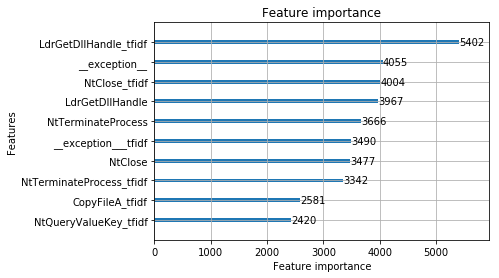

In [20]:
lgb.plot_importance(model, max_num_features=10)

In [132]:
x = np.random.randint(1, 10, (5, 2, 3))

In [133]:
x

array([[[5, 7, 3],
        [8, 6, 5]],

       [[1, 6, 1],
        [9, 5, 5]],

       [[5, 5, 6],
        [5, 9, 5]],

       [[6, 3, 2],
        [1, 8, 3]],

       [[8, 4, 3],
        [7, 6, 7]]])

In [146]:
x.transpose((1, 0, 2))

array([[[5, 7, 3],
        [1, 6, 1],
        [5, 5, 6],
        [6, 3, 2],
        [8, 4, 3]],

       [[8, 6, 5],
        [9, 5, 5],
        [5, 9, 5],
        [1, 8, 3],
        [7, 6, 7]]])

In [22]:
# test_features, _ = gen_features_label(test)
pred = model.predict(test_features, num_iteration=model.best_iteration)

In [23]:
pred[:10]

array([[9.96555300e-01, 4.04215582e-05, 7.55648625e-05, 8.01647091e-05,
        3.56849173e-05, 3.21286387e-03],
       [9.95902625e-01, 3.75492340e-05, 1.54431965e-04, 6.76217157e-05,
        3.45405949e-05, 3.80323188e-03],
       [9.99841395e-01, 8.41698916e-06, 1.28843895e-05, 1.03568345e-05,
        8.34423297e-06, 1.18602496e-04],
       [9.97684460e-01, 2.20974162e-05, 3.68790240e-05, 2.84263724e-05,
        2.17392436e-05, 2.20639763e-03],
       [9.99849703e-01, 6.04791041e-06, 1.68053083e-05, 6.47096386e-06,
        6.06002402e-06, 1.14913237e-04],
       [9.99035261e-01, 1.99620514e-05, 1.16363473e-04, 2.91997336e-05,
        2.37559043e-05, 7.75457986e-04],
       [9.99530873e-01, 2.37156629e-05, 9.53748090e-05, 2.01221386e-05,
        1.42579991e-05, 3.15656393e-04],
       [9.99875751e-01, 6.29873128e-06, 1.35111854e-05, 8.67573234e-06,
        6.26198879e-06, 8.95009604e-05],
       [9.99203937e-01, 1.85263935e-05, 5.25523501e-05, 2.86321709e-05,
        1.68223114e-05, 

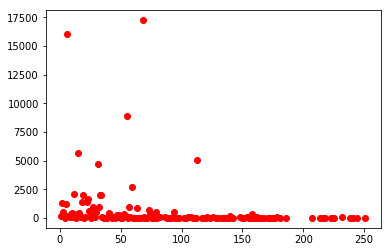

In [48]:

plt.plot(api_counts[5], 'ro')

In [3]:
apis

,api,id
0,GetSystemTimeAsFileTime,1
1,NtAllocateVirtualMemory,2
2,NtFreeVirtualMemory,3
3,SetUnhandledExceptionFilter,4
4,LdrLoadDll,5
5,LdrGetProcedureAddress,6
6,LdrUnloadDll,7
7,NtCreateMutant,8
8,NtCreateSection,9
9,NtMapViewOfSection,10
